# **Fourier transformation and convolution**

<div style="color:#777777;margin-top: -15px;">
<b>Author</b>: Norman Juchler |
<b>Course</b>: ADLS ISP |
<b>Version</b>: v1.2 <br><br>
<!-- Date: 07.03.2025 -->
<!-- Comments: Language refactored only in intro -->
</div>

In the previous lecture, we extended the concept of the Fourier series to the Fourier transform. Similar to the Fourier series, the Fourier transform is a mathematical tool that allows us to represent a function in terms of its frequency components. However, in contrast to the Fourier series, the Fourier transform results in a **continuous function in frequency**, and can be applied to a much wider class of aperiodic signals $x(t) $.

The Fourier transform and its inverse are defined as follows:

$$
\begin{align*}
X(\omega) &= \int_{-\infty}^{\infty} x(t) \cdot e^{-i\omega t} dt\\
x(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} X(\omega) \cdot e^{i\omega t} d\omega
\end{align*}
$$

where $x(t)$ is the input signal, $X(\omega)$ is the Fourier transform of the signal, and $\omega$ is the angular frequency.


In the lecture, we focused on the **continuous-time** Fourier transform. However, in practice, we usually work with discrete-time signals. The **discrete-time** Fourier transform (DTFT) is the discrete counterpart of the continuous-time Fourier transform. 

For practical use, we often need a version of the Fourier transform that applies to discrete-time signals. This version is called the **Discrete Fourier Transform (DFT)**. The DFT and its inverse are defined as follows:


<!-- 
# Discrete-time Fourier transform (DTFT)
# Note that X(ω) is a continuous function in ω!
# If we sample X(ω), we end up with the DFT.
# Only with the DFT, we can work with finite number 
# of samples both in the time and frequency domain.
# The FFT, finally, is an efficient algorithm that 
# leads to the DFT coefficients.

$$
\begin{align*}
X(\omega) &= \sum_{k=-\infty}^{\infty} x[k] \cdot e^{-i\omega n}\\
x[n] &= \frac{1}{2\pi}\int_{2\pi} X(\omega) \cdot e^{i\omega n} d\omega
\end{align*}
$$ -->


$$
\begin{align*}
X[k] &= \sum_{n=0}^{N-1} x[n] \cdot e^{-i2\pi \frac{n}{N} k}\\
x[n] &= \frac{1}{N} \cdot \sum_{k=0}^{N-1} X[k] \cdot e^{i 2\pi \frac{n}{N} k}
\end{align*}
$$

Where $x[n]$ is the discrete-time input signal, $X[k]$ is the DFT of the signal, and $N$ is the number of samples in the signal.

The DFT allows us to analyze the frequency content of discrete-time signals with a **finite number of samples**. We can think of the DFT as a sampled version of the continuous-time Fourier transform. Although its derivation is somewhat complex, as it requires sampling in both the time and frequency domains, the DFT retains many key properties of the continuous-time Fourier transform. Specifically, the DFT is linear, satisfies the convolution theorem, and preserves the symmetry properties of the Fourier transform.


The **Fast Fourier Transform (FFT)** is a highly efficient algorithm to compute the DFT $X[k]$ of a discrete signal $x[n]$ with a finite number of samples. Conversely, we can use the **inverse FFT (IFFT)** to reconstruct the original signal (or an approximation) from its frequency-domain representation.

\***Technical Note:** Different FFT implementations may compute the DFT up to a constant factor. Scipy’s FFT implementation uses an "energy-preserving" FFT that grows with the number of samples. To compute the magnitude of the FFT, we must divide the result by the number of samples.

In this exercise, we will use the FFT to analyze the frequency content of a signal, explore some of its properties, and filter the signal by zeroing some of its frequency components in the frequency domain. Then, we will reconstruct the signal using the inverse FFT.


<!--
## **Exercises**
* [Exercise 1](#exercise1)  
* [Exercise 2](#exercise2)  
* [Exercise 3](#exercise3)  
* [Exercise 4](#exercise4)  
* [Exercise 5](#exercise5)  
-->

---

## **Preparations**

Let's begin with the usual preparatory steps...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.fft import fft, ifft, fftfreq, fftshift

# For audio playback
from IPython.display import Audio

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import isp


---

<a id='exercise1'></a>

## **&#9734;  Exercise 1 – The FFT**

In the following, we will be using the FFT provided by the package scipy.fft. Let's first get familiar with the package. 

### **Instructions** 

* Read this tutorial: https://realpython.com/python-scipy-fft/  
  (Skip the part about discrete cosine and discrete sine transforms)
* Have a look at the list of functions of the [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/fft.html) package
* Assume that we are given a discrete, real-valued signal `x` with `len(x)==100` samples.
* Answer the following questions:
  1. What does the function `fft(x)` return?
  2. What is the meaning of `X[0]` if `X=fft(x)`?
  3. What is the meaning of `X[N//2]` if `X=fft(x)`?
  4. What is the purpose of the functions `fftfreq()` and `fftshift()`?
  5. Which are the relevant functions to create an amplitude spectrum and a phase spectrum from a signal `x[t]`?
  6. What is the purpose of the function `ifft()`?
  7. Why is it often useful to use `rfft()` (and `irfft()`)?
  8. What is the purpose of the argument `n` in the function `fft(x, n)`?



In [2]:
######################
###    SOLUTION from Teacher  ###
######################

# Question 1: What does the function `fft(x)` return?
# Answer 1:   The function `fft(x)` returns the DFT of the input signal `x`.
#             Generally, the DFT is a complex-valued array of the same length
#             as the input signal `x`.

# Question 2: What is the meaning of X[0] if X=fft(x)?
# Answer 2:   The value X[0] is the DC component of the input signal `x`.
#             In fact, it is the sum of all the samples in the input signal `x`.
#             This follows from the definition of the DFT, with k=0. Also note
#             how the contribution of X[0] to the inverse DFT leads to the 
#             average value of the input signal `x`: np.sum(x) / N.

# Question 3: What is the meaning of X[N//2] if X=fft(x)?
# Answer 3:   The value X[N//2] is the DFT of the input signal `x` at the 
#             Nyquist frequency. The Nyquist frequency is half the sampling
#             frequency, and is the maximum frequency that can be represented
#             in the DFT of a signal. 

# Question 4: What is the purpose of the functions `fftfreq()` and `fftshift()`?
# Answer 4:   The function `fftfreq()` returns the frequency bins corresponding
#             to the DFT of a signal. The function `fftshift()` shifts the
#             zero-frequency component to the center of the spectrum. This is
#             useful for visualization purposes, and to better understand the
#             frequency content of the signal. The function `fftshift()` is
#             often used in conjunction with `fftfreq()` to plot the amplitude
#             spectrum of a signal, and to better understand the frequency
#             content of the signal.

# Question 5: Which are the relevant functions to create an amplitude spectrum
#             and a phase spectrum from a signal `x[t]`?
# Answer 5:   np.abs(fft(x)): amplitude spectrum of x[n]
#             np.angle(fft(x)): phase spectrum of x[n]
#             For plotting the amplitude spectrum of a signal, the following 
#             functions are also useful:
#             fftfreq(len(x), 1/fs): frequency bins corresponding to the DFT of x[n]
#             fftshift(fft(x)): shift the zero-frequency component to the center of the spectrum
#             np.angle(fft(signal)), fftfreq(len(signal), 1/fs), fftshift(fft(signal)

# Question 6: What is the purpose of the function `ifft()`?
# Answer 6:   The function `ifft()` returns the inverse DFT of the input signal.
#             This is useful to transform the DFT of a signal back to the time
#             domain. 

# Question 7: Why is it often useful to use `rfft()` (and `irfft()`)?
# Answer 7:   Real-valued signals have a symmetric DFT: the negative frequency
#             components are the complex conjugate of the positive frequency.
#             This means that for real-valued signals half of the DFT is 
#             redundant. `rfft()` saves memory and computation time by only
#             returning the positive frequency components of the DFT.

# Question 8: What is the purpose of the argument n in the function fft(x, n)?
# Answer 8:   The argument n specifies the length of the DFT. If n is greater
#             than the length of the input signal `x`, the input signal is
#             zero-padded to length n. If n is smaller than the length of the
#             input signal `x`, the input signal is truncated to length n.


---

<a id='exercise2'></a>

## **&#9734; Exercise 2 – Spectral analysis of audio data**

In this exercise, we analyze the frequency content of audio data.

### **Instructions**:
* Load an audio file
   * Use the convenience function `load_audio()` for this.
   * Choose a file under ../data/signals, but you can also use your own audio. 
   * Note: The audio file should not be too long (30s max), as the visualization   
     is not optimized for a large number of samples
* Make sure that the data is a **stereo** signal with two channels: `shape (N, 2)`
* Visualize the time-domain data for each channel (left and right).
* Compute the DFT of each channel and visualize the amplitude spectrum.
* Compute the inverse DFT of each channel and visualize the time-domain data.
* Play the original audio and the reconstructed audio.



The signal has 2 channels and 93888 samples.


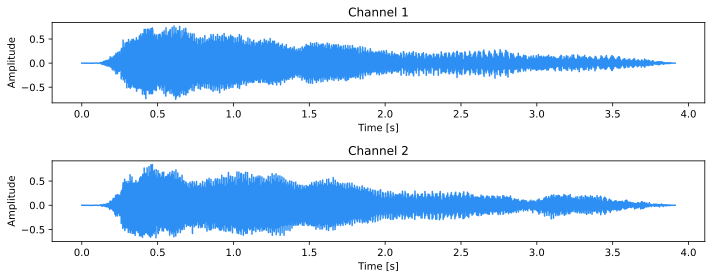

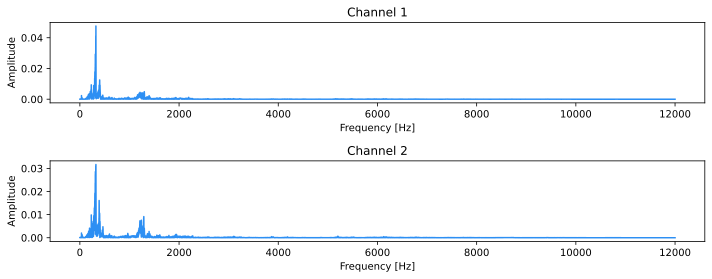

In [3]:
######################
###    EXCERISE    ###
######################

# Load the audio file, return the signal and the sampling frequency
x, fs = isp.load_audio("../data/signals/fail.mp3")
x, fs = isp.load_audio("../data/signals/boo.mp3")
nchannels, nsamples = x.shape
print("The signal has {} channels and {} samples.".format(nchannels, nsamples))

# Play the signal
display(Audio(x, rate=fs))

# Compute the duration of the signal
duration = nsamples / fs # in seconds 

# Visualize the data per channel
plt.figure(figsize=(10, 4))
for i in range(nchannels): 
    plt.subplot(nchannels, 1, i+1)
    plt.plot(np.arange(nsamples) / fs, x[i, :])
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("Channel {}".format(i+1))
plt.tight_layout()
plt.show()


# Compute the FFT of the signal
T = 1/fs
N = nsamples
xf = fft(x)
tf = np.linspace(0.0, 1.0/(2.0*T), N//2)


# Plot the amplitude spectrum of the signal
# Don't forget to scale the amplitude spectrum by 1/N
# (or 2/N for the positive frequency components).
# See the "Technical Note *" in the introduction.
xf_amplitude = 2/N * np.abs(xf)
plt.figure(figsize=(10, 4))
for i in range(nchannels):
    plt.subplot(nchannels, 1, i+1)
    plt.plot(tf, xf_amplitude[i, :N//2])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.title("Channel {}".format(i+1))
plt.tight_layout()
plt.show()


# Reconstruct the signal.
x_reconstruct = ifft(xf).real



# Compare the results
display(Audio(x, rate=fs))
display(Audio(x_reconstruct, rate=fs))

---

<a id='exercise3'></a>

## **&#9734; Exercise 3 – FFT of a periodic signal**

We have seen how to compute the **Fourier series** for a periodic signal. In this exercise, we compute the Fourier transform of such a signal.

### **Instructions**
* Create a periodic signal using [`scipy.signals`](https://docs.scipy.org/doc/scipy/reference/signal.html#waveforms) (e.g. a rectangular wave).
* Compute the FFT for this signal
* Visualize the amplitude and phase spectrum
* Compute the FFT for a delayed version of this signal
* Visualize the amplitude and phase spectrum of the delayed signal
* Compare and discuss

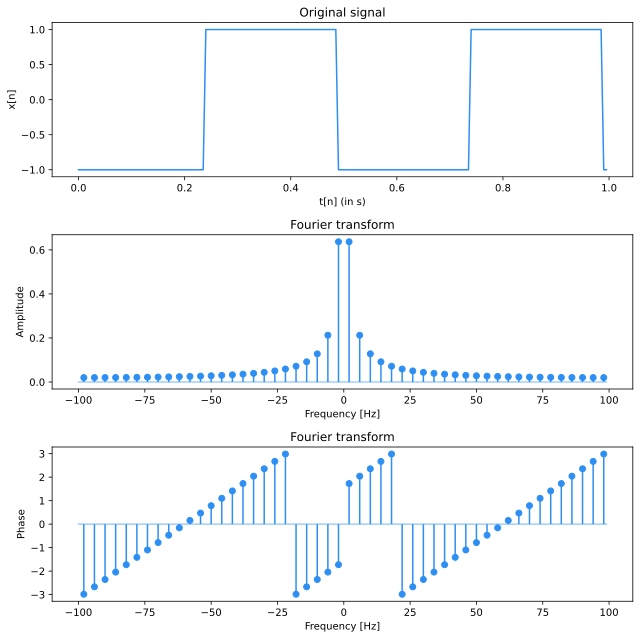

In [39]:
######################
###    EXCERISE    ###
######################
from scipy.signal import square
f = 1  # Signal frequency
fs = 200  # Sampling frequency --> play with this value!
phase = 3.  # Phase of the signal --> play with this value!
t = np.linspace(0,1,fs, endpoint = False) #sampling over 1 second
x = square( 2 * np.pi * 2 * f * t - phase)

# Compute the FFT of the signal
T = 1/fs #period in s 
N = len(t) #number of samples
xf = np.fft.fft(x)
tf =  np.fft.fftfreq(len(x),1/fs)

# Compute the amplitude spectrum of the signal
amplitude = 1/N * np.abs(xf) #1/N because we have positive and negative frequency components for only positive we use xf[:N//2]
xf_phase = np.angle(xf)

# Set the phase and amplitude to NaN for very small amplitudes
xf_phase[amplitude < 1e-7] = np.nan
amplitude[amplitude < 1e-7] = np.nan

# Visualize the signal and its Fourier transform
fig, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=False)
axes[0].plot(t,x)
axes[0].set_title("Original signal")
axes[0].set_xlabel("t[n] (in s)")
axes[0].set_ylabel("x[n]")

axes[1].stem(tf, amplitude)
axes[1].set_title("Fourier transform")
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("Amplitude")

axes[2].stem(tf, xf_phase)
axes[2].set_title("Fourier transform")
axes[2].set_xlabel("Frequency [Hz]")
axes[2].set_ylabel("Phase")
plt.tight_layout()


---

<a id='exercise4'></a>

## **&#9734; Exercise 4 – Spectrograms**

A spectrogram is a visual representation of the (amplitude) spectrum in a signal as it varies with time. The spectrogram is generated by dividing a time-domain signal into (overlapping) segments of equal length and applying the FFT to each segment, transforming the data from the time domain to the frequency domain. This process (splitting the signal into overlapping segments, computing the FFT) is sometimes referred to as the Short-Time Fourier Transform (STFT). ([Image source](https://commons.wikimedia.org/wiki/File:Spectrogram-19thC.png))

![Spectrogram](../data/doc/spectrogram.jpg)

In Python, there are several ways to create spectrograms. Two related methods are [`ShortTimeFFT.spectrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ShortTimeFFT.html) and [`plt.specgram()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html). See [here](https://scicoding.com/how-to-do-spectrogram-in-python/) for some instructions on how to use it. 

### **Instructions**
* Load an audio file using `isp.load_audio()``
* Select one channel
* Create spectogram
* Interpret the results


In [ ]:
######################
###    EXERCISE    ###
######################

# Load the audio file, return the signal and the sampling frequency
x, fs = isp.load_audio("../data/signals/boo.mp3")
x = x[0, :]
duration = len(x) / fs
duration_max = 1   # Clip the signal to 1 second max
x = x[:int(duration_max*fs)]

# Choose an appropriate window length
# Should be a power of 2.
win = 1024

# Create a spectrogram
...

---

<a id='exercise5'></a>

## **&#9734; Exercise 5 – Naive filtering**

In this last exercise, we want to filter a signal by zeroing the frequencies that we wish to have removed. Does this naive filtering approach work?

### **Instructions**
* Load an audio file using `isp.load_audio()``
* Select one channel
* Compute the FFT of the signal
* Visualize the magnitude spectrum
* Set the highest most frequencies to zero
* Compute the inverse FFT
* Listen to the result

In [ ]:
######################
###    EXERCISE    ###
######################

# Load the audio file, return the signal and the sampling frequency
x, fs = isp.load_audio("../data/signals/bees.mp3")
x = x[0, :]
duration = len(x) / fs
duration_max = 10   # Clip the signal to 10 seconds max
x = x[:int(duration_max*fs)]

# Compute the FFT of the signal (use rfft)
xf = ...
tf = ...

# Visualize the amplitude spectrum of the signal
... 

# Zero out the upper 30% of the FFT
xf[:int(0.7*len(xf))] = 0

# Reconstruct the signal
x_reconstructed = ...

# Listen to the result
print("Original")
display(Audio(x, rate=fs))
print("Reconstructed")
display(Audio(x_reconstructed, rate=fs))

Naive filtering works, but it introduces artifacts. This is because the ideal filter is not realizable in practice. We lose information in the frequency domain, and the inverse FFT introduces artifacts because of its finite length. We will see how to design better filters in the next section.